<a href="https://colab.research.google.com/github/DWA-GIT/TESI-UNIFACISA/blob/master/KMeans(N%C3%A3o_Supervisionado)_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install seaborn==0.9.0

In [2]:
import pandas as pd
uri_filmes = 'https://raw.githubusercontent.com/DWA-GIT/TESI-UNIFACISA/master/movies_novo.csv'
filmes = pd.read_csv(uri_filmes)
filmes.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
filmes.shape

(9742, 3)

In [4]:
filmes.columns = ['filme_id', 'titulo', 'generos']
filmes.head(5)

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
generos = filmes.generos.str.get_dummies()
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head(5)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
dados_dos_filmes.shape

(9742, 23)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

generos_escalados = scaler.fit_transform(generos)

generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [0]:
generos_escalados.shape

In [0]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=20)
modelo.fit(generos_escalados)


In [0]:
print(f'Grupos {modelo.labels_}')
modelo.labels_.shape

In [20]:
print(generos.columns)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')


In [21]:
print(modelo.cluster_centers_)

[[-5.91799474e-02 -4.38060315e-01 -1.58472558e-01  3.99043938e-01
   5.73237947e-01  2.65865198e-01 -2.93730038e-01 -2.55128051e-02
  -1.45266568e-01  2.07382434e-01 -9.49256298e-02 -2.56669800e-01
  -1.28397078e-01  5.30732180e+00 -1.79384963e-01  3.38296772e-01
  -2.57119540e-01 -4.66074463e-01 -1.67786948e-01 -1.32065337e-01]
 [-5.91799474e-02  2.08070220e+00 -3.85948500e-01 -2.58679155e-01
  -2.70451223e-01 -1.20666821e-01 -3.74631584e-01 -2.17489438e-01
  -1.98063297e-01 -1.81527500e-01 -9.49256298e-02 -3.34055205e-01
  -1.28397078e-01 -1.88418950e-01 -2.49986367e-01 -3.74710131e-01
  -3.34434762e-01  3.83961166e-01 -2.02019716e-01 -1.32065337e-01]
 [-5.91799474e-02 -4.38289697e-01 -3.80771165e-01 -2.58679155e-01
  -2.70451223e-01  5.01347694e-01 -3.32281383e-01 -2.17489438e-01
   3.25621436e-01 -9.28359053e-02 -9.49256298e-02 -3.34055205e-01
  -1.28397078e-01 -1.88418950e-01 -2.49986367e-01  2.25920562e+00
  -2.79507340e-01 -4.36327549e-01 -2.02019716e-01 -1.32065337e-01]
 [-5.91

In [22]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,-0.438060,-0.158473,0.399044,0.573238,0.265865,-0.293730,-0.025513,-0.145267,0.207382,-0.094926,-0.256670,-0.128397,5.307322,-0.179385,0.338297,-0.257120,-0.466074,-0.167787,-0.132065
1,-0.059180,2.080702,-0.385949,-0.258679,-0.270451,-0.120667,-0.374632,-0.217489,-0.198063,-0.181527,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.374710,-0.334435,0.383961,-0.202020,-0.132065
2,-0.059180,-0.438290,-0.380771,-0.258679,-0.270451,0.501348,-0.332281,-0.217489,0.325621,-0.092836,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,2.259206,-0.279507,-0.436328,-0.202020,-0.132065
3,-0.059180,-0.480607,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,0.978540,-0.203879,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.005908,-0.202020,-0.132065
4,-0.059180,-0.231649,-0.351618,-0.258679,-0.270451,-0.345338,-0.179058,-0.217489,-0.565623,0.008883,-0.094926,2.993517,-0.128397,-0.188419,-0.249986,-0.349160,-0.334435,0.628546,-0.202020,-0.132065
5,-0.059180,-0.456038,-0.357392,-0.238898,-0.260936,-0.599974,-0.338134,4.597924,-0.808616,-0.277127,-0.094926,-0.318096,-0.128397,-0.188419,-0.229602,-0.429675,-0.334435,-0.479140,-0.078470,-0.132065
6,-0.059180,-0.146991,1.315176,3.865793,3.697524,0.321475,-0.285105,-0.217489,-0.756600,0.774060,-0.094926,-0.320074,-0.128397,0.157951,-0.196412,-0.283702,-0.082998,-0.491259,-0.158725,-0.132065
7,-0.059180,-0.480607,-0.385949,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,-0.266703,-0.168289,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.442699,-0.202020,-0.132065
8,-0.059180,0.940433,2.591019,-0.258679,-0.270451,-0.111872,-0.292916,-0.217489,-0.234395,0.719686,-0.094926,-0.259613,-0.128397,-0.188419,-0.221462,-0.019527,-0.334435,0.006196,-0.202020,-0.132065
9,-0.059180,0.499684,-0.267842,-0.258679,-0.270451,-0.159219,2.669289,-0.217489,0.240211,-0.247488,-0.094926,-0.322407,-0.128397,-0.188419,-0.249986,-0.310221,-0.307280,0.676338,-0.202020,-0.132065


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f11bddac4a8>,
      dtype=object)

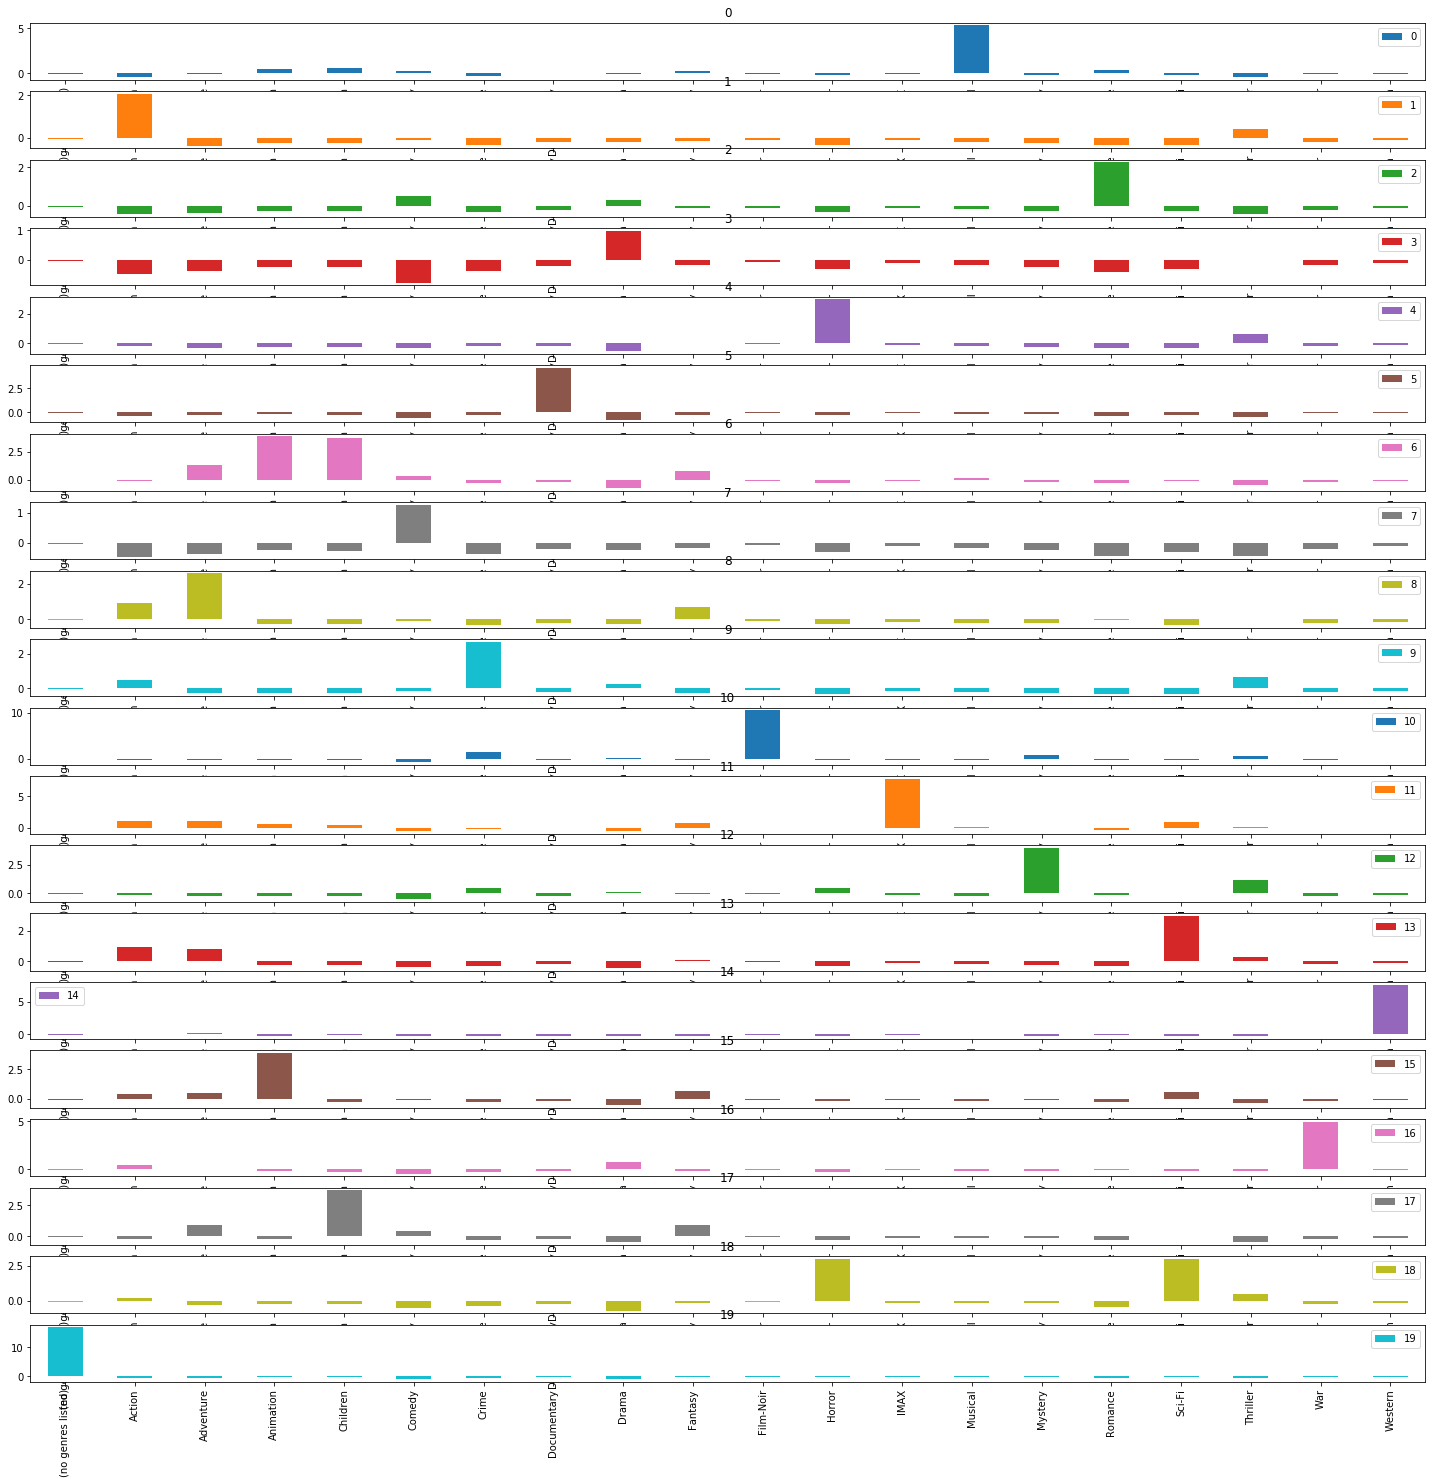

In [24]:
grupos.transpose().plot.bar(subplots=True,figsize=(25,25), sharex=False)

In [0]:
grupo = 0

filtro = modelo.labels_ == grupos

dados_dos_filmes[filtro].sample(10)